In [13]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
Plant_Growth= {
    
    'Plant_type':np.random.choice(['Snake_plant','Aloe_Vera','Spider_plant','Peace_Lily'],100),
    'Light_Exposure':np.round(np.random.uniform(12,4,100),2),
    'Leaf_Count_Start':np.round(np.random.uniform(20,5,100),2),
    'Leaf_Count_End':np.round(np.random.uniform(28,5,100),2),
    'Leaf_Growth':np.round(np.random.uniform(10,0,100),2),
}

df=pd.DataFrame(Plant_Growth)
df.to_csv('Plant_Growth_data.csv',index=False)

In [15]:
df=pd.read_csv('Plant_Growth_data.csv')
print("Original Data Shape:",df.shape)

Original Data Shape: (100, 5)


In [16]:
df.loc[np.random.choice(df.index,10),'Light_Exposure']=np.nan
df.loc[np.random.choice(df.index,5),'Leaf_Count_Start']=np.nan

In [17]:
df.to_csv('Plant_Growth_data_miss.csv',index=False)

In [18]:
df=pd.read_csv('Plant_Growth_data_miss.csv')
print("Original Data Shape:",df.shape)
df['Light_Exposure']=df['Light_Exposure'].fillna(df['Light_Exposure'].mean())
df=df.dropna(subset=['Leaf_Count_Start'])
print("Cleaned Data Shape:",df.shape)
df.to_csv('Plant_Growth_data_clean.csv',index=False)

Original Data Shape: (100, 5)
Cleaned Data Shape: (95, 5)


In [20]:
#Numpy
Light_Exposure=df['Light_Exposure'].to_numpy()
Leaf_Count_Start=df['Leaf_Count_Start'].to_numpy()
correlation=np.corrcoef(Light_Exposure,Leaf_Count_Start)[0,1]
print(f"Correlation between Light Exposure and Leaf Count Start:{correlation:.2f}")

Correlation between Light Exposure and Leaf Count Start:-0.01


In [21]:
#Extra NumPy operation
median_leaf = np.median(df['Leaf_Count_End'])
print("Median Leaf Count End:", median_leaf)

Median Leaf Count End: 19.12


In [22]:
#Scipy
Snake_plant_Leaf_Count_Start=df[df['Plant_type']=='Snake_plant']['Leaf_Count_Start']
Aloe_Vera_Leaf_Count_Start=df[df['Plant_type']=='Aloe_Vera']['Leaf_Count_Start']
t_stat,p_value=stats.ttest_ind(Snake_plant_Leaf_Count_Start,Aloe_Vera_Leaf_Count_Start)
print(f"T-test between Snake Plant and Aloe Vera Leaf Count Start :t={t_stat:.2f},p={p_value:3f}")

T-test between Snake Plant and Aloe Vera Leaf Count Start :t=1.91,p=0.064118


In [23]:
#Statsmodels
X=sm.add_constant(df['Leaf_Count_Start'])
model=sm.OLS(df['Light_Exposure'],X).fit()
print("\nlinear Regression Summary:")
print(model.summary())


linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:         Light_Exposure   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                   0.01979
Date:                Wed, 21 May 2025   Prob (F-statistic):              0.888
Time:                        19:26:54   Log-Likelihood:                -201.82
No. Observations:                  95   AIC:                             407.6
Df Residuals:                      93   BIC:                             412.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const       

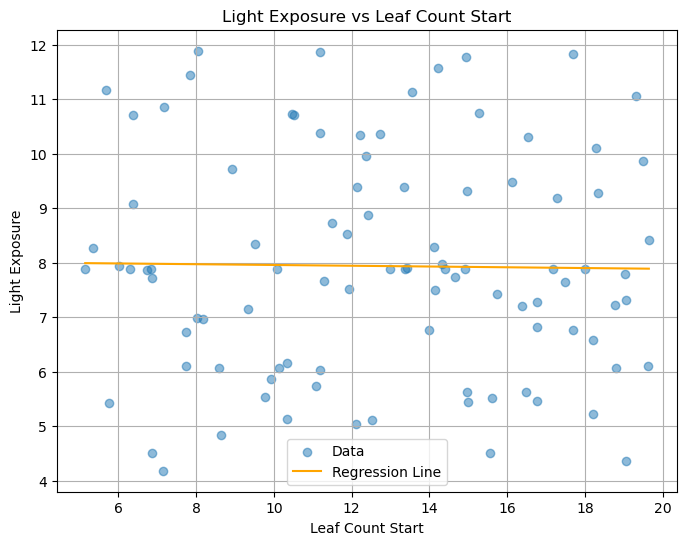

In [24]:
#Visualisation(Linear Registration) via Matplotlib
plt.figure(figsize=(8,6))
plt.scatter(df['Leaf_Count_Start'],df['Light_Exposure'],alpha=0.5,label='Data')
x_range=np.linspace(df['Leaf_Count_Start'].min(),df['Leaf_Count_Start'].max(),100)
y_pred=model.params.iloc[0]+model.params.iloc[1]*x_range
plt.plot(x_range,y_pred,color='orange',label='Regression Line')
plt.title('Light Exposure vs Leaf Count Start')
plt.xlabel('Leaf Count Start')
plt.ylabel('Light Exposure')
plt.legend()
plt.grid(True)
plt.show()

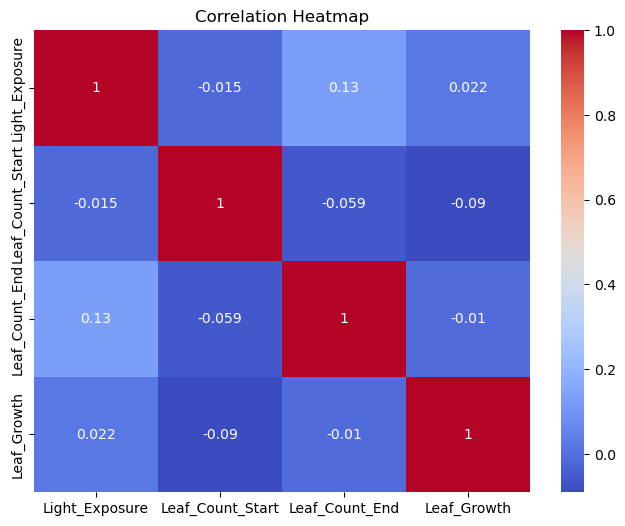

In [25]:
#Statistical visualisation(Boslot?Heatmap) via Seaborn
plt.figure(figsize=(8,6))
sns.boxplot(x='Plant_type',y='Leaf_Growth',data=df)
plt.title('generation of Leaf Growth on Plant type')
plt.savefig('generation_of_Leaf_Growth_on_Plant_type.png')
plt.close()
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

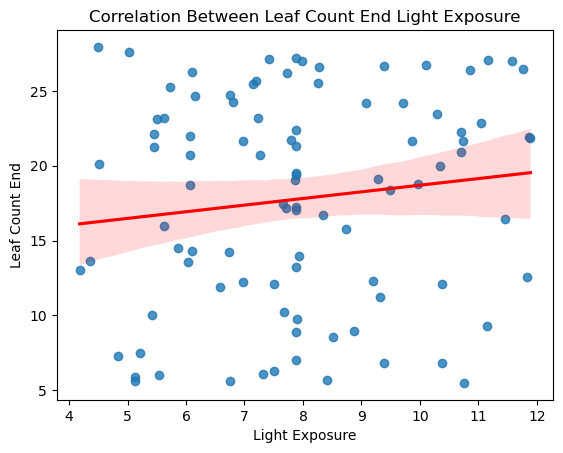

In [26]:
#Correlation plot with regression line
sns.regplot(data=df, x='Light_Exposure', y='Leaf_Count_End', line_kws={'color': 'red'})
plt.title('Correlation Between Leaf Count End Light Exposure')
plt.xlabel('Light Exposure')
plt.ylabel('Leaf Count End')
plt.show()